## KNN Örneği

In [13]:
# Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# uyarıları kapat
import warnings
warnings.filterwarnings("ignore")

In [14]:
# veriyi oku
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


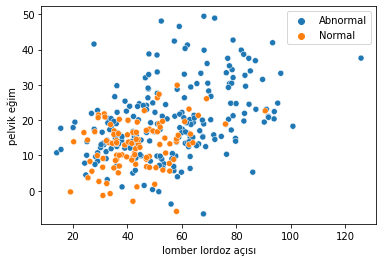

In [19]:
# Görseleştirelim.
sns.scatterplot(data = data, x = "lumbar_lordosis_angle", 
                             y = "pelvic_tilt numeric",
                             hue = "class")
plt.xlabel("lomber lordoz açısı")
plt.ylabel("pelvik eğim")
plt.legend()
plt.show()

In [20]:
# class verilerini sayısala çevirelim 
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [21]:
# class sütununu çıkaralım. Sınıfları y içine koyalım.
# y sadece etiketlerden oluşsun
y = data["class"].values
x_data = data.drop(["class"], axis = 1) 

In [22]:
# normalizasyon (min-max)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [23]:
# Eğitim test bölünmesi kütüphanesi
from sklearn.model_selection import train_test_split

In [24]:
# eğitim test ayrılması
# %15 test, %85 Eğitim
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)

In [25]:
# KNN İşlemleri
from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = 4
knn = KNeighborsClassifier(n_neighbors = komsu_sayisi)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print(" {} En Yakın Komşu Modeli Test Doğruluk : {} ".format(komsu_sayisi, knn.score(x_test, y_test)))

 4 En Yakın Komşu Modeli Test Doğruluk : 0.6382978723404256 


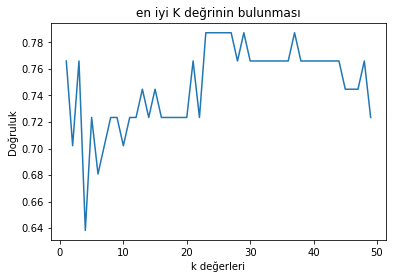

In [27]:
# en iyi k değerinin bulunması
score_list = []
for each in range(1, 50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))

# görsel
plt.plot(range(1, 50), score_list)
plt.xlabel("k değerleri")
plt.ylabel("Doğruluk")
plt.title("en iyi K değrinin bulunması")
plt.show()